In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [3]:
# load dataframe 
users_df = pd.read_pickle('cleaned_data/bikes_logistic.pkl')

In [4]:
users_df.above_avg_casual.value_counts(normalize=True)

0    0.63991
1    0.36009
Name: above_avg_casual, dtype: float64

### labels imbalances 
64% below and 36% above casual user

need do weighted sampling 

In [5]:
#Define appropriate X and y
X = users_df.drop(columns=['above_avg_casual'])
y = users_df.above_avg_casual
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [6]:
display(y_train.value_counts(normalize = True))
display(y_test.value_counts(normalize=True))
# similar distribution for both 

0    0.636643
1    0.363357
Name: above_avg_casual, dtype: float64

0    0.649712
1    0.350288
Name: above_avg_casual, dtype: float64

In [7]:
def logreg(weight):
    '''
    inputs:
    weight: class weight for logreg 
    returns:
    y_hat_test
    y_score
    fpr,tpr, thresholds 
    also auc curve 
    '''
    logreg = LogisticRegression(
        fit_intercept=False, C=1e12, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train,y_train)
    print(model_log)
    y_hat_test = logreg.predict(X_test)
    y_score = logreg.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC:',  auc(fpr, tpr))
    lw = 2
    plt.plot(fpr, tpr,
             lw=lw, label='ROC curve')
    return model_log, y_hat_test, y_score, fpr, tpr, thresholds 
    

In [8]:
weights = [None, 'balanced', {1:0.36, 0:0.64}]

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC: 0.8681552369474884


(LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                    fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([ 0.65624968, -2.29697143, -3.36901423, ..., -3.67341844,
        -2.09421733, -1.63706314]),
 array([0.       , 0.       , 0.       , ..., 0.9978746, 0.9978746,
        1.       ]),
 array([0.00000000e+00, 6.57030223e-04, 3.02233903e-02, ...,
        9.99342970e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  6.03657202,   5.03657202,   4.00240365, ...,  -6.83690697,
         -6.95185539, -11.14951526]))

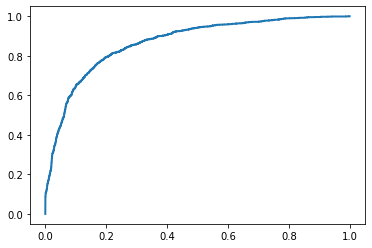

In [9]:
# None
logreg(weights[0])

LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC: 0.8677914614465464


(LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
                    fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([ 1.29075762, -1.57530405, -2.88977195, ..., -2.9069413 ,
        -1.59512526, -1.02468287]),
 array([0.       , 0.       , 0.       , ..., 0.9978746, 0.9978746,
        1.       ]),
 array([0.00000000e+00, 6.57030223e-04, 2.95663601e-02, ...,
        9.99342970e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  6.62368751,   5.62368751,   4.56605964, ...,  -6.2169308 ,
         -6.84187298, -10.40623433]))

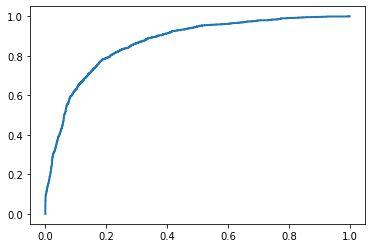

In [10]:
# balanced 
logreg(weights[1])

LogisticRegression(C=1000000000000.0, class_weight={0: 0.64, 1: 0.36},
                   dual=False, fit_intercept=False, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
AUC: 0.867677417943372


(LogisticRegression(C=1000000000000.0, class_weight={0: 0.64, 1: 0.36},
                    dual=False, fit_intercept=False, intercept_scaling=1,
                    l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                    penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([ 0.01065808, -3.05684288, -3.87431147, ..., -4.44759109,
        -2.61122684, -2.26005373]),
 array([0.        , 0.        , 0.        , ..., 0.99433227, 0.99433227,
        1.        ]),
 array([0.00000000e+00, 6.57030223e-04, 3.61366623e-02, ...,
        9.99342970e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  5.46023224,   4.46023224,   3.47450229, ...,  -7.08243397,
         -7.08716764, -11.92509572]))

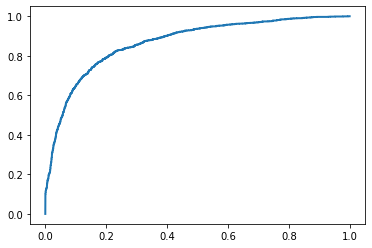

In [11]:
logreg(weights[2])

In [42]:
# initialize smote 
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())#Preview synthetic sample class distribution
# 50 to 50 

1    8298
0    8298
dtype: int64


In [73]:
logreg = LogisticRegression(fit_intercept = False, max_iter=200, C = 1e6,solver ='lbfgs')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log
y_hat_test = logreg.predict(X_test)
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC:', auc(fpr, tpr))

AUC: 0.867964621377897


In [69]:
clf = LogisticRegressionCV(Cs=[100000,1000000,10000000,100000000],cv = 10, max_iter=200)

# Train model
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100000, 1000000, 10000000, 100000000],
                     class_weight=None, cv=10, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=200,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [74]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=[100000, 1000000, 10000000, 100000000],
                     class_weight=None, cv=10, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=200,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)>

In [70]:
accuracy_score(y_test,clf.predict(X_test))

0.8121979286536248

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test))
auc(fpr, tpr)

0.7847697694412752

In [99]:
# grid search 
pipe = Pipeline([('classifier' , LogisticRegression())])
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear','lbfgs']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.0s finished


In [100]:
best_clf.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.03359818286283781, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [101]:
best_clf.best_params_

{'classifier': LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 0.03359818286283781,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [102]:
best_clf.best_score_

0.8188583704158355

In [103]:
y_pred = best_clf.predict(X_test)

In [104]:

accuracy_score(y_test,clf.predict(X_test))

0.8082853855005754

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test))
auc(fpr, tpr)

0.7738860626271062